In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DATA IMPORTING

In [2]:
train = pd.read_csv(r'E:\DSA\Project\train.csv\train.csv')
train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [3]:
train=train.drop('Unnamed: 0',axis=1)
train.set_index('id',inplace=True)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 70172 to 62567
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1

## MISSING VALUES HANDLING

In [5]:
train['Arrival Delay in Minutes']=train['Arrival Delay in Minutes'].fillna(train['Arrival Delay in Minutes'].median())

## CHECK FOR DISTRIBUTION OF CONTINUOUS VARIABLES

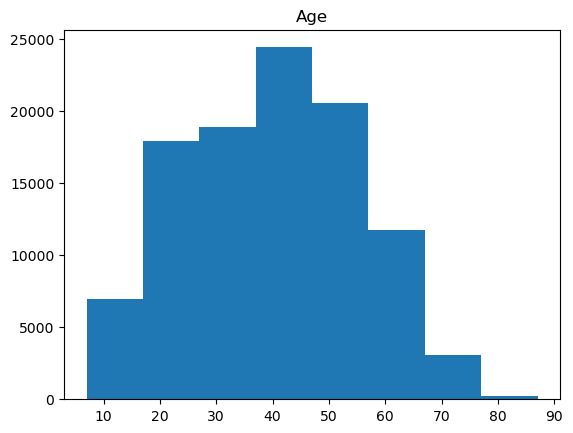

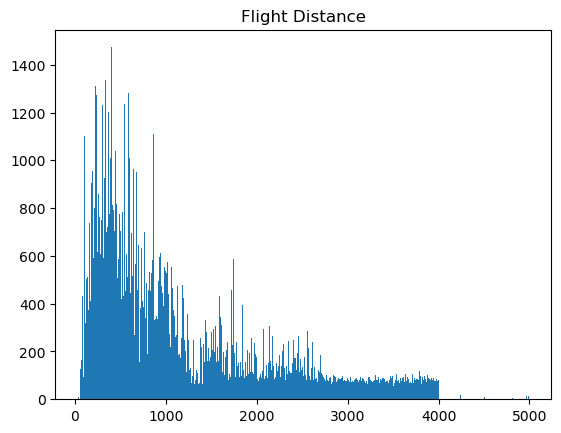

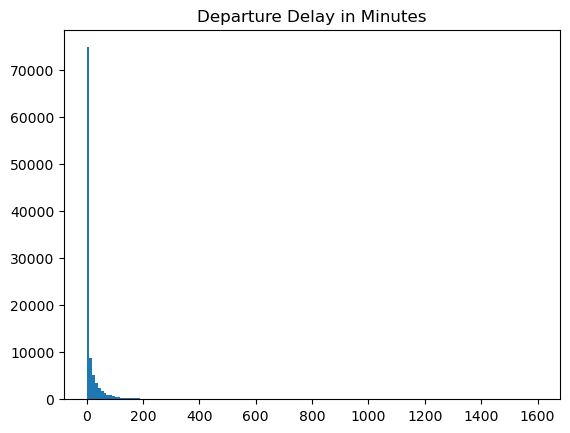

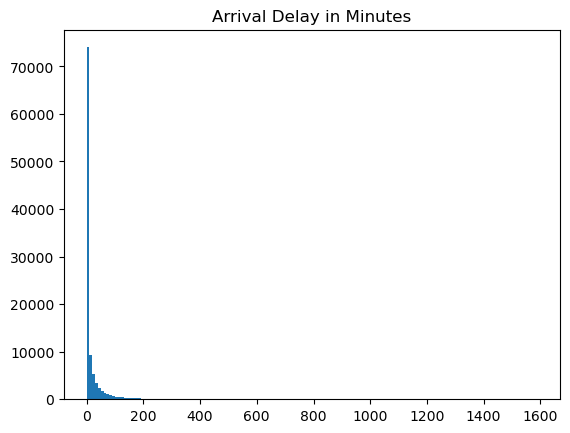

In [6]:
for i in ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']:
    plt.hist(train[i],bins=np.arange(min(train[i]),max(train[i])+10, 10))
    plt.title(i)
    plt.show()

## CHECK FOR CORRELATION 

C:\Users\teena\AppData\Local\Temp\ipykernel_26800\1630104878.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


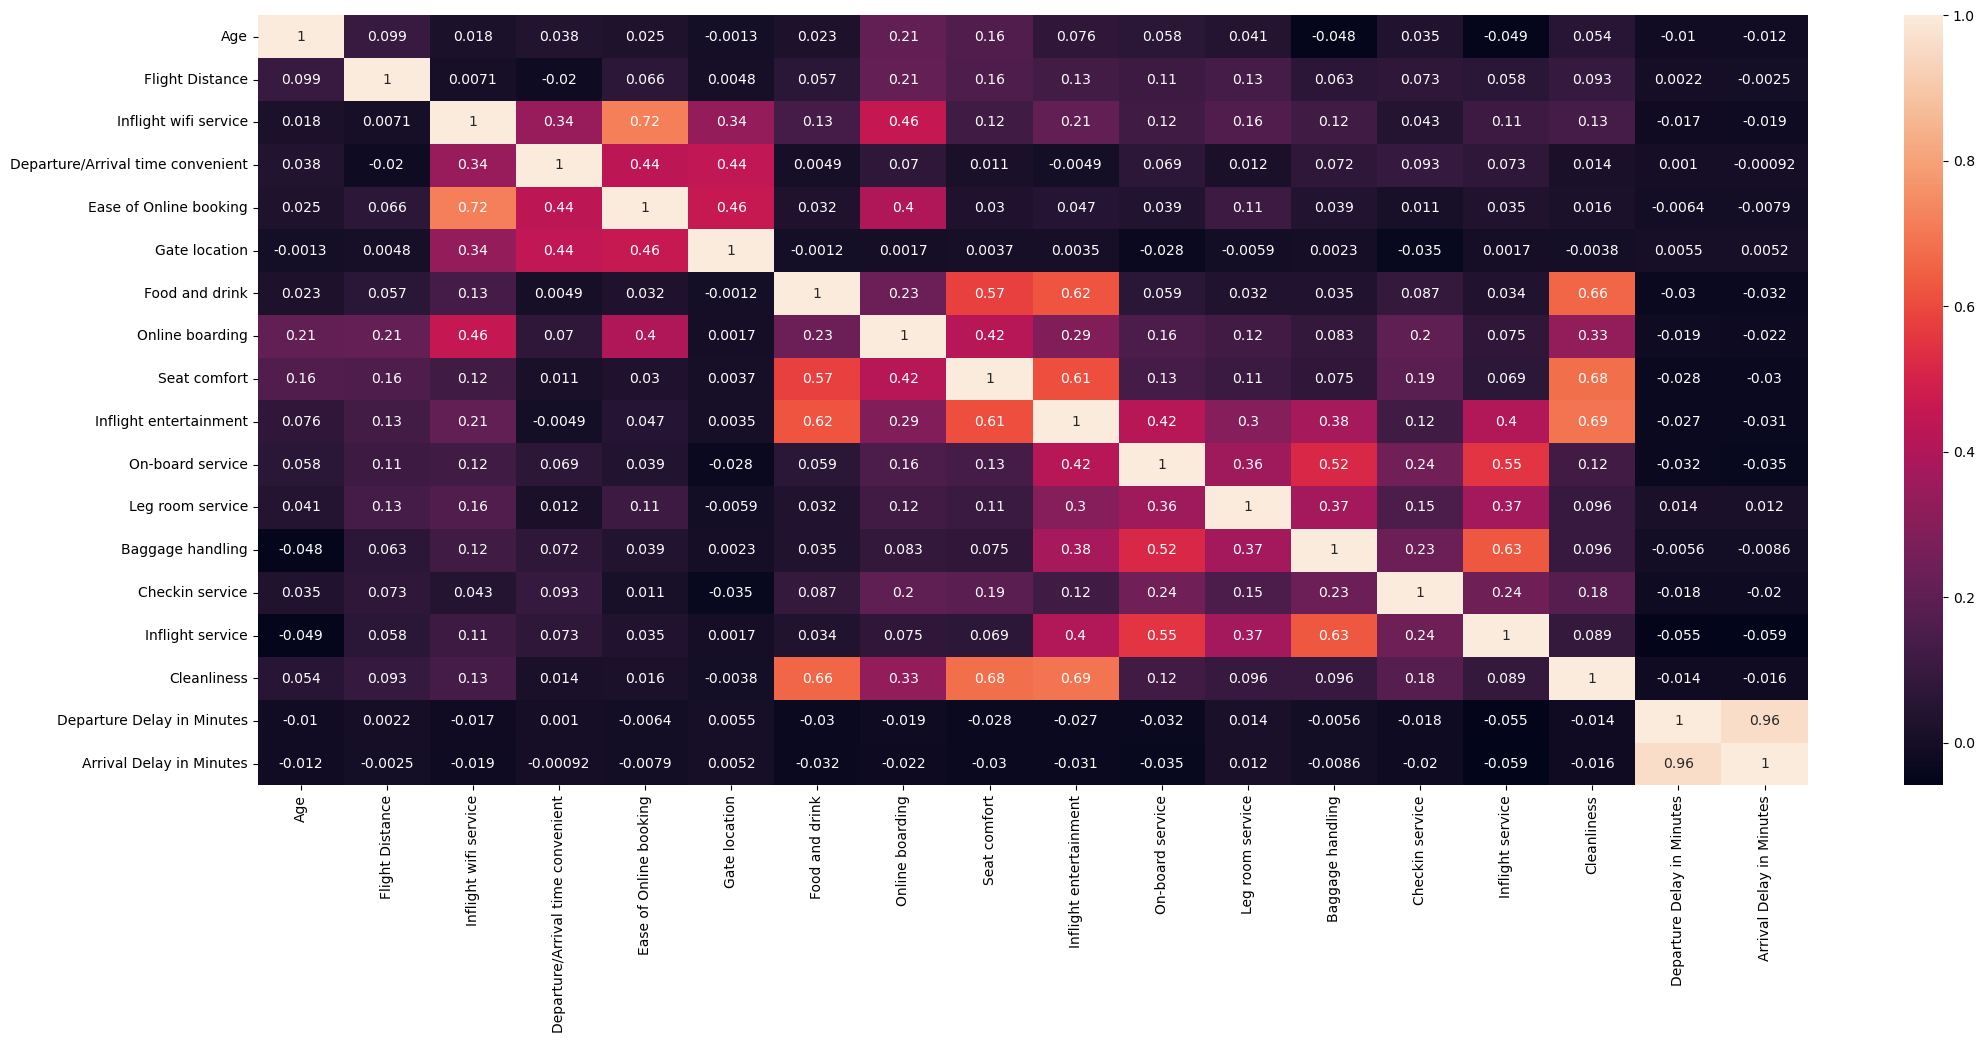

In [7]:
fig, ax = plt.subplots(figsize=(25,10)) 
sns.heatmap(train.corr(),annot=True)
plt.show()

C:\Users\teena\AppData\Local\Temp\ipykernel_26800\3431371694.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(method='spearman'),annot=True)


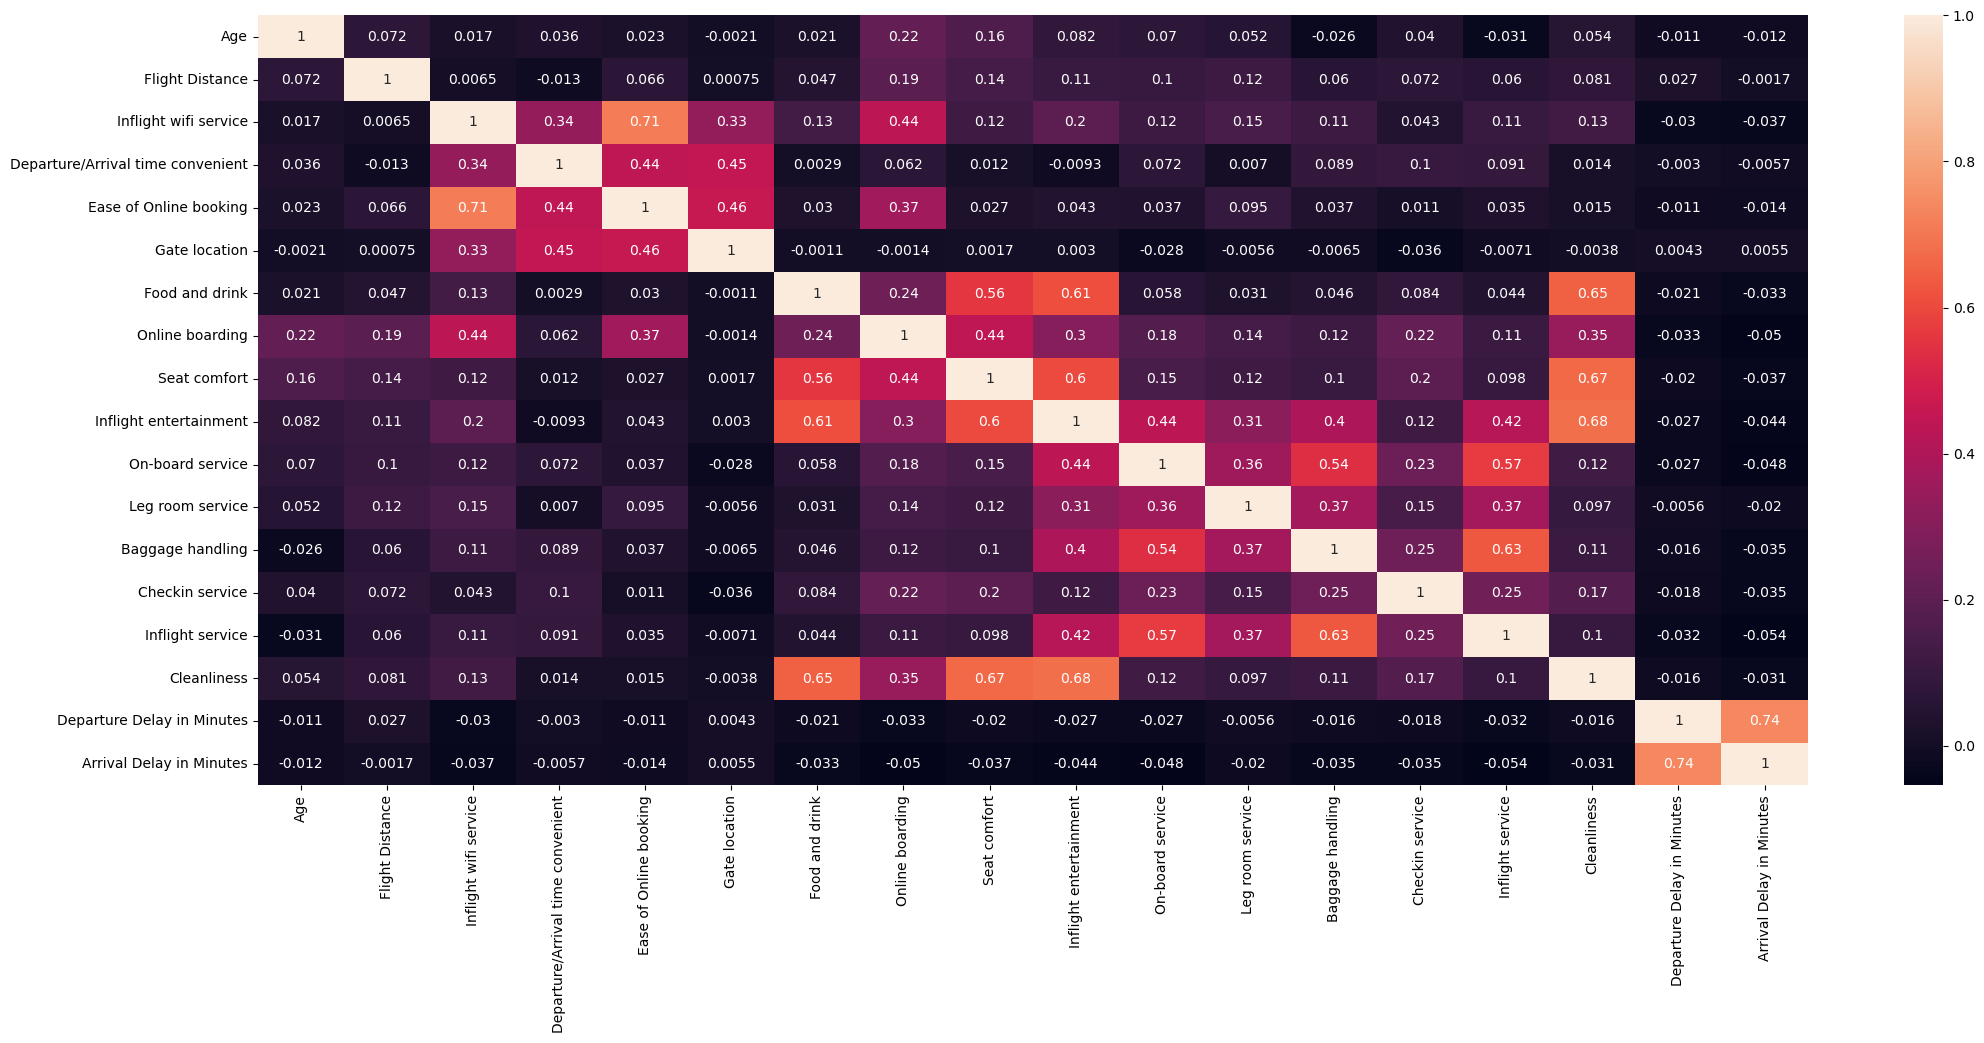

In [8]:
fig, ax = plt.subplots(figsize=(25,10)) 
sns.heatmap(train.corr(method='spearman'),annot=True)
plt.show()

In [9]:
train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## RELEVENCE OF VARIABLES

In [10]:
cat_vars = ['Gender', 'Customer Type', 'Type of Travel', 'Class','Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','satisfaction']
num_vars = ['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [11]:
from scipy.stats import chi2_contingency

In [12]:
def chi_sqr(var1,var2):
    # Create a contingency table
    contingency_table = pd.crosstab(var1, var2)

    # Perform the chi-square test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print("P-value:", p_val)

In [13]:
for i in cat_vars:
            chi_sqr(train[i],train['satisfaction'])

P-value: 8.496755458033522e-05
P-value: 0.0
P-value: 0.0
P-value: 0.0
P-value: 0.0
P-value: 2.8976924656572356e-95
P-value: 0.0
P-value: 0.0
P-value: 0.0
P-value: 0.0
P-value: 0.0
P-value: 0.0
P-value: 0.0
P-value: 0.0
P-value: 0.0
P-value: 0.0
P-value: 0.0
P-value: 0.0
P-value: 0.0


In [14]:
from statsmodels.stats.weightstats import ztest

In [15]:
train['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [16]:
def Z_test(i):
    grouped = train.groupby('satisfaction')[i]
    subset_A = grouped.get_group(train['satisfaction'].unique()[0])
    subset_B = grouped.get_group(train['satisfaction'].unique()[1])

    [z_stat, p_val]=ztest(subset_A,subset_B,value=0)
    print('Z-test to study if',i,'affects satisfaction')
    print("H0:",i,"does not affect satisfaction")
    print("H1:",i,"affects satisfaction")
    print("The probability value is",p_val)
    if p_val<0.05:
        print('Reject the null hypothesis')
    else:
        print('Accept the null hypothesis')
    print("")

In [17]:
for i in num_vars:
    Z_test(i)

Z-test to study if Age affects satisfaction
H0: Age does not affect satisfaction
H1: Age affects satisfaction
The probability value is 0.0
Reject the null hypothesis

Z-test to study if Flight Distance affects satisfaction
H0: Flight Distance does not affect satisfaction
H1: Flight Distance affects satisfaction
The probability value is 0.0
Reject the null hypothesis

Z-test to study if Departure Delay in Minutes affects satisfaction
H0: Departure Delay in Minutes does not affect satisfaction
H1: Departure Delay in Minutes affects satisfaction
The probability value is 1.036418248264706e-59
Reject the null hypothesis

Z-test to study if Arrival Delay in Minutes affects satisfaction
H0: Arrival Delay in Minutes does not affect satisfaction
H1: Arrival Delay in Minutes affects satisfaction
The probability value is 9.081374995404153e-77
Reject the null hypothesis



## COMBINE RELATED DATA 

In [18]:
network=pd.DataFrame([train['Inflight wifi service'],train['Ease of Online booking'],train['Online boarding']])
comfort=pd.DataFrame([train['Food and drink'],train['Seat comfort'],train['Inflight entertainment'],train['Cleanliness']])
service=pd.DataFrame([train['On-board service'],train['Baggage handling'],train['Inflight service']])

In [19]:
train['network']=network.median()
train['comfort']=comfort.median()
train['service']=service.median()

In [20]:
train=train.drop(['Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service','Baggage handling', 'Inflight service','Cleanliness', 'Arrival Delay in Minutes'],axis=1)
train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Gate location,Leg room service,Checkin service,Departure Delay in Minutes,satisfaction,network,comfort,service
id,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,4,1,3,4,25,neutral or dissatisfied,3.0,5.0,4.0
5047,Male,disloyal Customer,25,Business travel,Business,235,2,3,5,1,1,neutral or dissatisfied,3.0,1.0,3.0
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,3,4,0,satisfied,2.0,5.0,4.0
24026,Female,Loyal Customer,25,Business travel,Business,562,5,5,5,1,11,neutral or dissatisfied,2.0,2.0,3.0
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,4,3,0,satisfied,3.0,3.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94171,Female,disloyal Customer,23,Business travel,Eco,192,1,3,1,2,3,neutral or dissatisfied,2.0,2.0,3.0
73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,5,5,0,satisfied,4.0,4.5,5.0
68825,Male,disloyal Customer,30,Business travel,Business,1995,1,3,2,5,7,neutral or dissatisfied,1.0,4.0,4.0


## SCALING & TRANSFORMATION 

In [21]:
import math

In [22]:
train[ 'Departure Delay in Minutes'] = train[ 'Departure Delay in Minutes'].apply(lambda x: math.log(x) if x > 0 else 0)

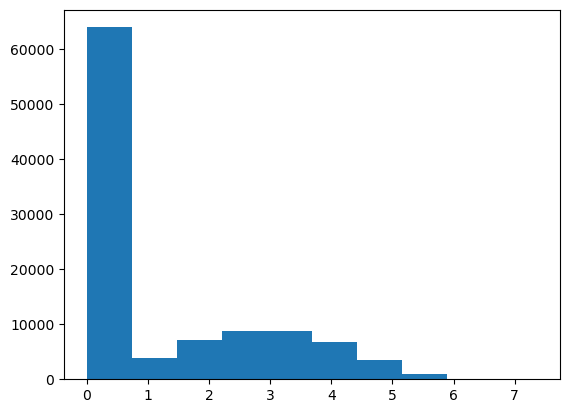

In [23]:
plt.hist(train[ 'Departure Delay in Minutes'])
plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [26]:
# Fit and transform the data using Min-Max scaling
dist=np.array(train['Flight Distance'])
dist=dist.reshape(-1, 1)
train['Flight Distance'] = scaler.fit_transform(dist)

In [27]:
from sklearn.preprocessing import StandardScaler

# Sample data
age = np.array(train['Age'])
age =age.reshape(-1,1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data using StandardScaler
train['Age'] = scaler.fit_transform(age)

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()

In [30]:
train['satisfaction']=le.fit_transform(train['satisfaction'])

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
enc=OneHotEncoder(drop='first')

In [33]:
train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure/Arrival time convenient', 'Gate location',
       'Leg room service', 'Checkin service', 'Departure Delay in Minutes',
       'satisfaction', 'network', 'comfort', 'service'],
      dtype='object')

In [34]:
categ=['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [35]:
others=['Age','Flight Distance', 'Departure/Arrival time convenient', 'Gate location',
       'Leg room service', 'Checkin service', 'Departure Delay in Minutes',
       'satisfaction', 'network', 'comfort', 'service']

In [36]:
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the selected columns
encoded_cols = encoder.fit_transform(train[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))
encoded_df.index=train.index
# Concatenate the encoded DataFrame with the remaining columns
train = pd.concat([encoded_df, train.drop(columns=categorical_cols)],axis=1)
train

C:\Users\teena\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Age,Flight Distance,Departure/Arrival time convenient,Gate location,Leg room service,Checkin service,Departure Delay in Minutes,satisfaction,network,comfort,service
id,,,,,,,,,,,,,,,,
70172,1.0,0.0,1.0,0.0,1.0,-1.745279,0.086632,4,1,3,4,3.218876,0,3.0,5.0,4.0
5047,1.0,1.0,0.0,0.0,0.0,-0.951360,0.041195,2,3,5,1,0.000000,0,3.0,1.0,3.0
110028,0.0,0.0,0.0,0.0,0.0,-0.885200,0.224354,2,2,3,4,0.000000,1,2.0,5.0,4.0
24026,0.0,0.0,0.0,0.0,0.0,-0.951360,0.107229,5,5,5,1,2.397895,0,2.0,2.0,3.0
119299,1.0,0.0,0.0,0.0,0.0,1.430397,0.036955,3,3,4,3,0.000000,1,3.0,3.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94171,0.0,1.0,0.0,1.0,0.0,-1.083680,0.032512,1,3,1,2,1.098612,0,2.0,2.0,3.0
73097,1.0,0.0,0.0,0.0,0.0,0.636478,0.467690,4,4,5,5,0.000000,1,4.0,4.5,5.0
68825,1.0,1.0,0.0,0.0,0.0,-0.620561,0.396607,1,3,2,5,1.945910,0,1.0,4.0,4.0


In [37]:
train.describe()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Age,Flight Distance,Departure/Arrival time convenient,Gate location,Leg room service,Checkin service,Departure Delay in Minutes,satisfaction,network,comfort,service
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,1.039040e+05,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,0.492541,0.182678,0.310373,0.449886,0.072124,6.906839e-18,0.233935,3.060296,2.976883,3.351055,3.304290,1.177567,0.433333,2.775293,3.365559,3.604067
std,0.499947,0.386404,0.462649,0.497485,0.258695,1.000005e+00,0.201363,1.525075,1.277621,1.315605,1.265396,1.615240,0.495538,1.330758,1.204504,1.107421
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2.142239e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-8.190404e-01,0.077342,2.000000,2.000000,2.000000,3.000000,0.000000,0.000000,2.000000,2.500000,3.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,4.103858e-02,0.163974,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,3.000000,3.500000,4.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,7.687977e-01,0.345719,4.000000,4.000000,4.000000,4.000000,2.484907,1.000000,4.000000,4.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.018235e+00,1.000000,5.000000,5.000000,5.000000,5.000000,7.372746,1.000000,5.000000,5.000000,5.000000


In [47]:
X_train = train.drop(['satisfaction','Class_Eco','Class_Eco Plus','Type of Travel_Personal Travel'],axis=1)
#X_train = train[['Age','Flight Distance','network','comfort','service','Checkin service','Gate location','Gender_Male','Departure Delay in Minutes']]
y_train=train['satisfaction']

In [48]:
X_train

,Gender_Male,Customer Type_disloyal Customer,Age,Flight Distance,Departure/Arrival time convenient,Gate location,Leg room service,Checkin service,Departure Delay in Minutes,network,comfort,service
id,,,,,,,,,,,,
70172,1.0,0.0,-1.745279,0.086632,4,1,3,4,3.218876,3.0,5.0,4.0
5047,1.0,1.0,-0.951360,0.041195,2,3,5,1,0.000000,3.0,1.0,3.0
110028,0.0,0.0,-0.885200,0.224354,2,2,3,4,0.000000,2.0,5.0,4.0
24026,0.0,0.0,-0.951360,0.107229,5,5,5,1,2.397895,2.0,2.0,3.0
119299,1.0,0.0,1.430397,0.036955,3,3,4,3,0.000000,3.0,3.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
94171,0.0,1.0,-1.083680,0.032512,1,3,1,2,1.098612,2.0,2.0,3.0
73097,1.0,0.0,0.636478,0.467690,4,4,5,5,0.000000,4.0,4.5,5.0
68825,1.0,1.0,-0.620561,0.396607,1,3,2,5,1.945910,1.0,4.0,4.0


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [42]:
#train.to_csv(r"E:\DSA\Project\train1.csv", index=False)

In [43]:
 
from pycaret.classification import *

In [44]:
# Install PyCaret if you haven't already
# !pip install pycaret

# Initialize the PyCaret environment
clf = setup(data=train, target='satisfaction', session_id=42)

# Compare different classification models
best_model = compare_models()

# Tune hyperparameters of the best model
tuned_model = tune_model(best_model)

# Evaluate the tuned model
evaluate_model(tuned_model)

# Make predictions on new data
predictions = predict_model(tuned_model, data=train)

# Finalize the tuned model for deployment
final_model = finalize_model(tuned_model)

# Save the model
save_model(final_model, 'final_model')

,Description,Value
0,Session id,42
1,Target,satisfaction
2,Target type,Binary
3,Original data shape,"(103904, 16)"
4,Transformed data shape,"(103904, 16)"
5,Transformed train set shape,"(72732, 16)"
6,Transformed test set shape,"(31172, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9350,0.9824,0.9122,0.9361,0.9240,0.8672,0.8674,0.3320
rf,Random Forest Classifier,0.9333,0.9797,0.9072,0.9369,0.9218,0.8636,0.8640,0.9190
et,Extra Trees Classifier,0.9288,0.9780,0.8976,0.9355,0.9162,0.8544,0.8549,0.9740
gbc,Gradient Boosting Classifier,0.9221,0.9750,0.8974,0.9208,0.9089,0.8409,0.8411,0.3040
knn,K Neighbors Classifier,0.9052,0.9540,0.8748,0.9034,0.8889,0.8062,0.8066,2.8230
ada,Ada Boost Classifier,0.9049,0.9600,0.8835,0.8957,0.8895,0.8061,0.8061,0.3360
dt,Decision Tree Classifier,0.9017,0.9004,0.8906,0.8836,0.8870,0.8000,0.8001,0.2600
lr,Logistic Regression,0.8544,0.9143,0.8157,0.8431,0.8292,0.7024,0.7027,1.8450
svm,SVM - Linear Kernel,0.8537,0.0000,0.7811,0.8703,0.8219,0.6984,0.7028,0.2720
ridge,Ridge Classifier,0.8497,0.0000,0.8196,0.8311,0.8253,0.6934,0.6935,0.2710


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9358,0.9842,0.9128,0.9374,0.9249,0.8689,0.8691
1,0.9325,0.9807,0.9124,0.9304,0.9214,0.8622,0.8624
2,0.9341,0.9839,0.9213,0.9263,0.9238,0.8658,0.8658
3,0.9379,0.9823,0.9102,0.9444,0.9270,0.8729,0.8734
4,0.9376,0.9828,0.9130,0.9411,0.9269,0.8724,0.8727
5,0.9348,0.9831,0.9124,0.9356,0.9239,0.8669,0.8671
6,0.9354,0.9830,0.9112,0.9379,0.9244,0.8680,0.8683
7,0.9308,0.9796,0.9042,0.9341,0.9189,0.8586,0.8590
8,0.9373,0.9816,0.9169,0.9371,0.9269,0.8720,0.8722


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9372,0.9841,0.9158,0.9378,0.9267,0.8717,0.8719


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\teena\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Gender_Male',
                                              'Customer Type_disloyal Customer',
                                              'Type of Travel_Personal Travel',
                                              'Class_Eco', 'Class_Eco Plus',
                                              'Age', 'Flight Distance',
                                              'Departure/Arrival time '
                                              'convenient',
                                              'Gate location',
                                              'Leg room service',
                                              'Checkin...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_

In [45]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, y_train)
 
# Predicting the Target variable
pred = model.predict(X_test)
print(pred)
accuracy = model.score(X_test, y_test)
print(accuracy)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350
[0 0 0 ... 0 1 1]
0.9317645926567538


In [46]:
import pickle
pickle.dump(model,open('model.pkl','wb'))